In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"


In [3]:
df = pd.read_csv(url)

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


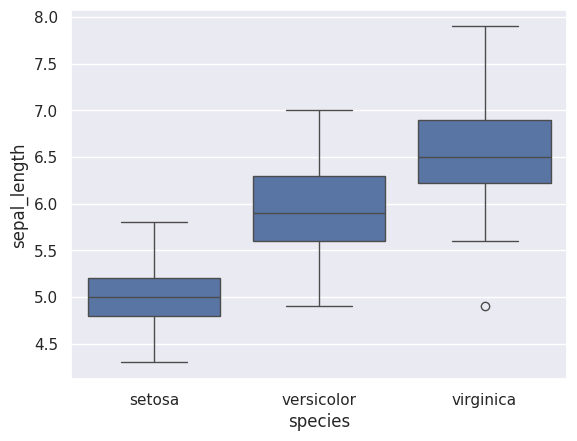

In [5]:
sns.set(style="darkgrid")
plt.figure()
sns.boxplot(x="species", y="sepal_length", data=df)
plt.show()

In [6]:
x=df.drop(columns=["species"])
y=df["species"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=20)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_val=sc.transform(x_val)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier=KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_val)
accuracy_score(y_val,y_pred)

0.9333333333333333

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [11]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
f1_list=[]
k_list=[]
for k in range(1,10):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_val)
    f=f1_score(y_val,y_pred,average="micro")
    f1_list.append(f)
    k_list.append(k)

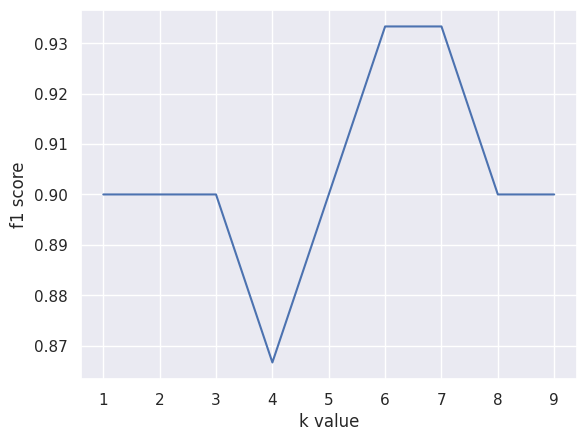

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot(k_list,f1_list)
plt.xlabel("k value")
plt.ylabel("f1 score")
plt.show()